Estatísticas Gerais:
Total de jogos: 7645
Período: 2003-03-29 até 2021-12-12
Times únicos: 45
Arenas únicas: 152


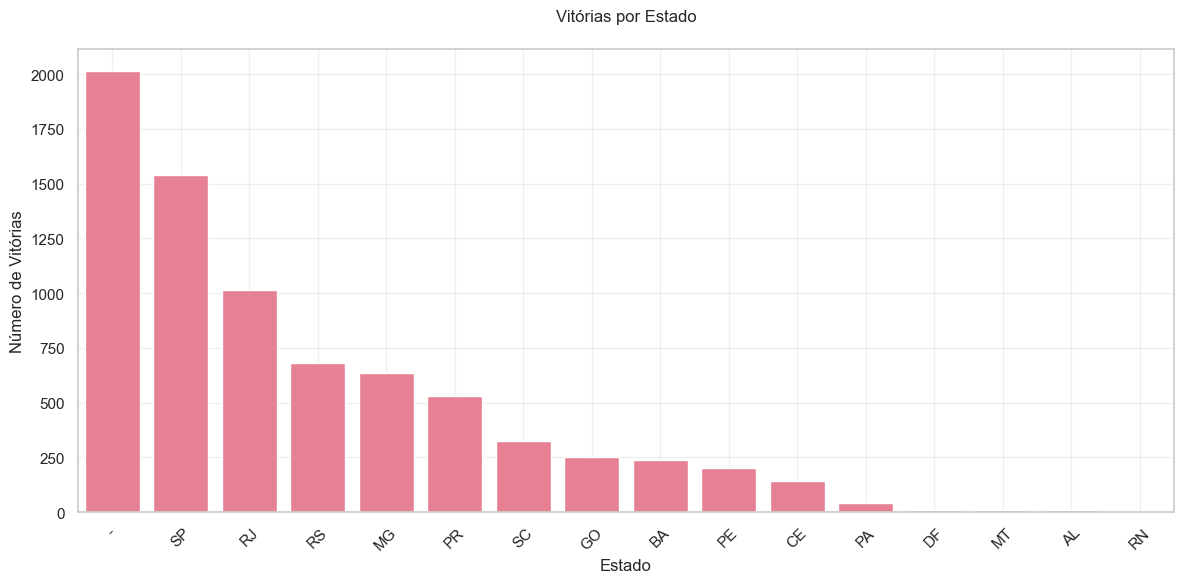

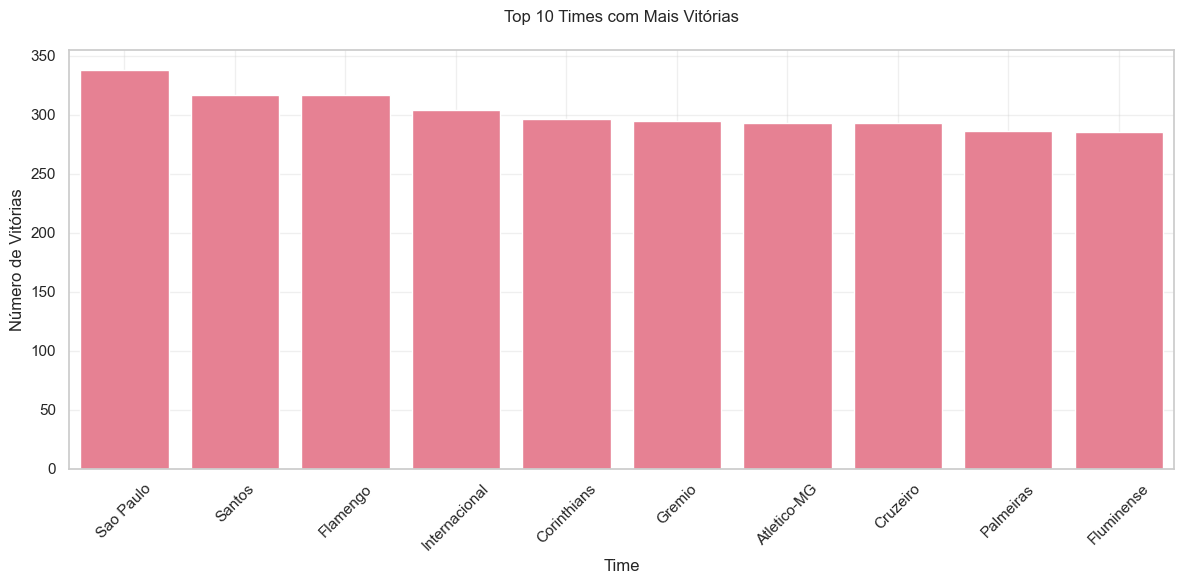

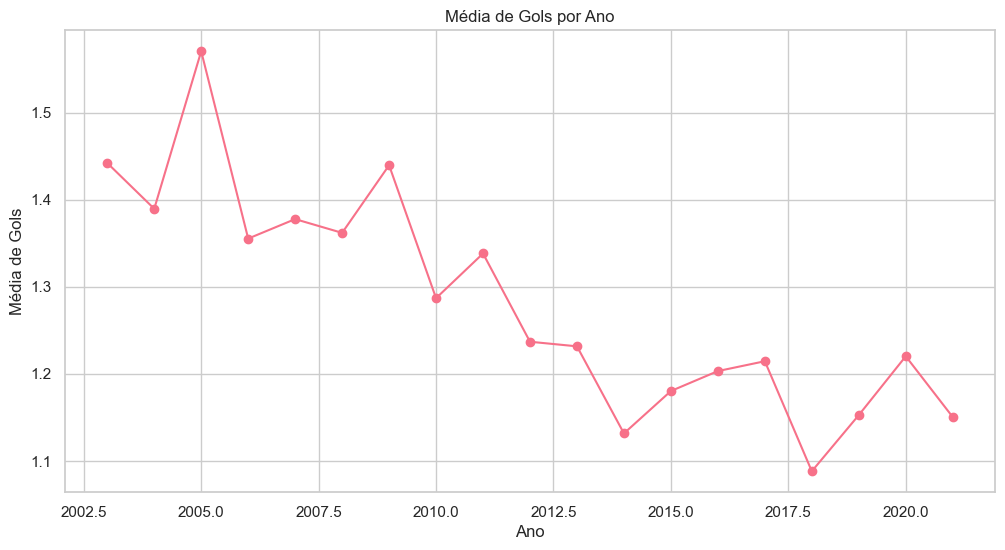


Percentual de empates: 26.36%


C:\Users\frexl\AppData\Local\Temp\ipykernel_19568\779175961.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  empates_ano = df.groupby('ano').apply(lambda x: (x['vencedor'] == '-').mean() * 100)


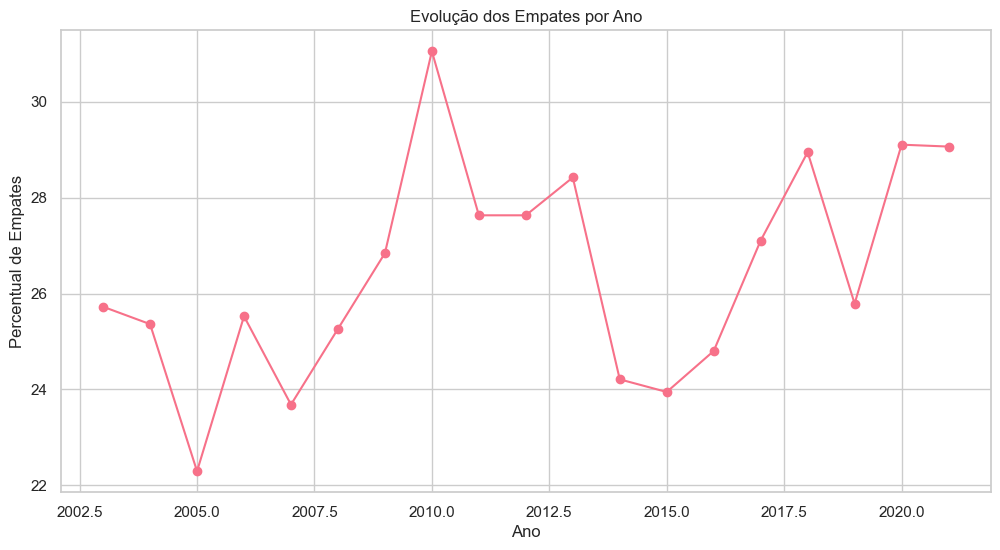

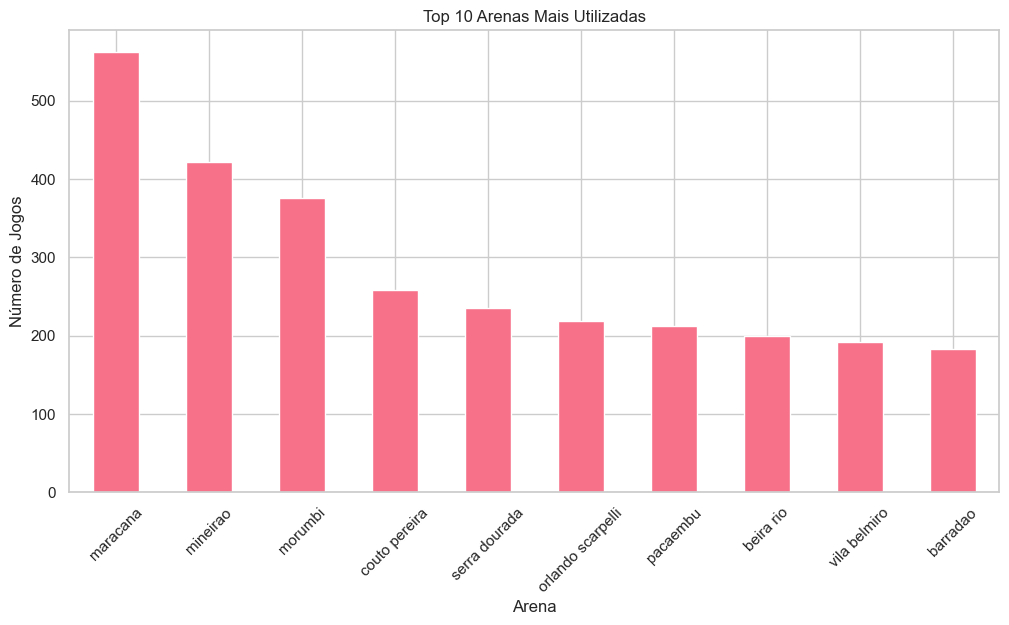

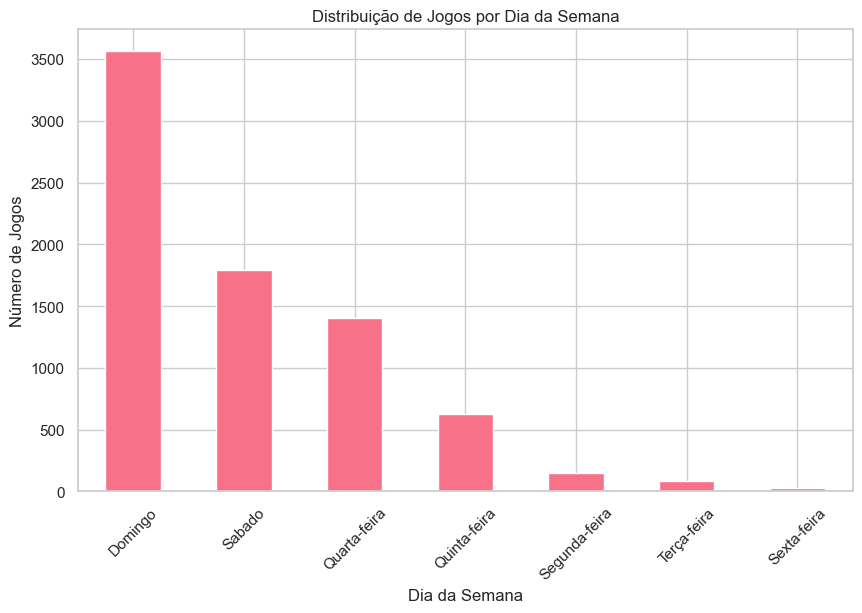

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for all plots
plt.style.use('ggplot')  # Changed from 'seaborn' to 'ggplot'

# Configure Seaborn style
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('campeonato-brasileiro-full.csv')

# 1. Estatísticas Gerais
print("Estatísticas Gerais:")
print(f"Total de jogos: {len(df)}")
print(f"Período: {df['data'].min()} até {df['data'].max()}")
print(f"Times únicos: {len(set(df['mandante'].unique()) | set(df['visitante'].unique()))}")
print(f"Arenas únicas: {df['arena'].nunique()}")

# 2. Análise de Vitórias
# Vitórias por estado
vitorias_estado = df['estado_vencedor'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=vitorias_estado.index, y=vitorias_estado.values)
plt.title('Vitórias por Estado', pad=20)
plt.xlabel('Estado')
plt.ylabel('Número de Vitórias')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Times com mais vitórias
times_vitorias = df[df['vencedor'] != '-']['vencedor'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=times_vitorias.index, y=times_vitorias.values)
plt.title('Top 10 Times com Mais Vitórias', pad=20)
plt.xlabel('Time')
plt.ylabel('Número de Vitórias')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Análise de Gols
# Média de gols por ano
df['ano'] = pd.to_datetime(df['data']).dt.year
gols_por_ano = df.groupby('ano').agg({
    'mandante_placar': 'mean',
    'visitante_placar': 'mean'
}).mean(axis=1)

plt.figure(figsize=(12, 6))
gols_por_ano.plot(kind='line', marker='o')
plt.title('Média de Gols por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Gols')
plt.grid(True)
plt.show()

# 4. Análise de Empates
empates = (df['vencedor'] == '-').mean() * 100
print(f"\nPercentual de empates: {empates:.2f}%")

# Empates por ano
empates_ano = df.groupby('ano').apply(lambda x: (x['vencedor'] == '-').mean() * 100)
plt.figure(figsize=(12, 6))
empates_ano.plot(kind='line', marker='o')
plt.title('Evolução dos Empates por Ano')
plt.xlabel('Ano')
plt.ylabel('Percentual de Empates')
plt.grid(True)
plt.show()

# 5. Análise de Arenas
# Top 10 arenas mais utilizadas
arenas_populares = df['arena'].value_counts().head(10)
plt.figure(figsize=(12, 6))
arenas_populares.plot(kind='bar')
plt.title('Top 10 Arenas Mais Utilizadas')
plt.xlabel('Arena')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.show()

# 6. Análise Temporal
# Jogos por dia da semana
jogos_dia = df['dia'].value_counts()
plt.figure(figsize=(10, 6))
jogos_dia.plot(kind='bar')
plt.title('Distribuição de Jogos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.show()